In [ ]:
import cv2
import sys
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from tqdm import tqdm
import math
from skimage.util.shape import view_as_windows



In [ ]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/cv_assig_3/'
NUMBER_OF_IMAGES = 3
left_images, right_images = [], []
for i in range(NUMBER_OF_IMAGES):
    left_images.append(path + 'l' + str(i + 1) + '.png')
    right_images.append(path + 'r' + str(i + 1) + '.png')

Mounted at /content/drive


# Showing images


(289, 382, 3)
(289, 382, 3)


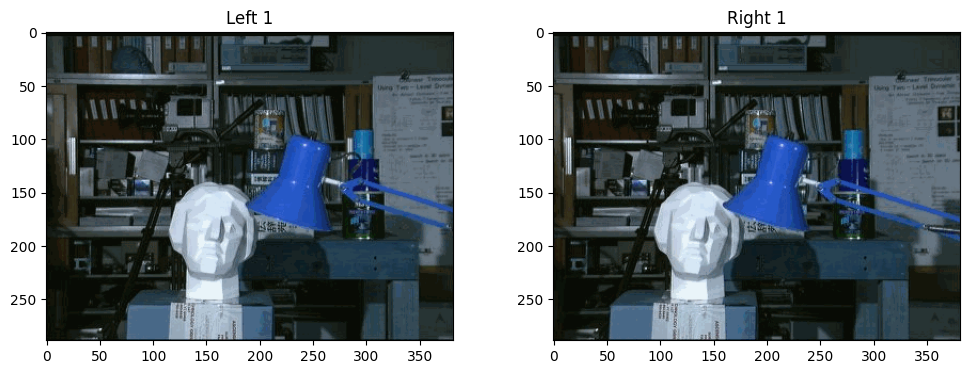

(375, 450, 3)
(375, 450, 3)


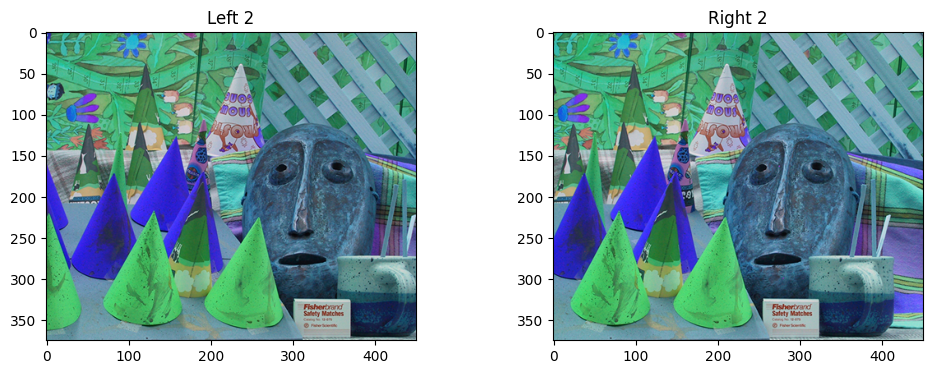

(375, 450, 3)
(375, 450, 3)


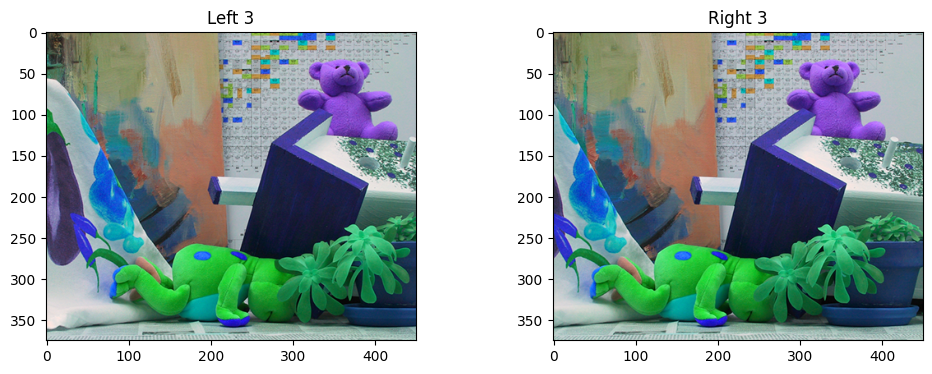

In [ ]:
for i in range(NUMBER_OF_IMAGES):
    Il = cv2.imread(left_images[i])
    Ir = cv2.imread(right_images[i])
    print(Il.shape)
    print(Ir.shape)


    # Create subplots with two plots in a row
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Plot the left disparity map
    im_left = axs[0].imshow(Il)
    axs[0].set_title(f"Left {i+1}")

    # Plot the right disparity map
    im_right = axs[1].imshow(Ir)
    axs[1].set_title(f"Right {i+1}")

    # Show the plots
    plt.show()

# Block Matching

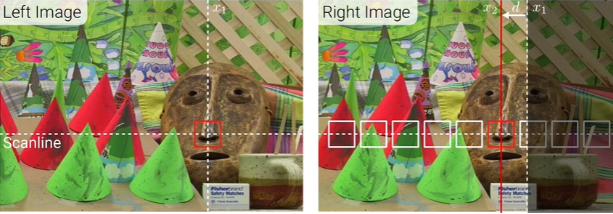

In [ ]:
def get_disparity_map(left_image, right_image, window_size, method):
    # Initialize an array for the disparity map
    disparity_map = np.zeros_like(left_image)

    # Extract windows from the left image
    left_image_windows = view_as_windows(left_image, (window_size, window_size))
    half_window = window_size // 2
    rows, cols = left_image_windows.shape[0], left_image_windows.shape[1]

    # Iterate through each window in the left image
    for row in range(rows):
        for col in range(cols):
            # Extract the current window from the left image
            curr_left_window = left_image_windows[row, col]

            # Calculate the height of the corresponding window in the right image
            height_of_right_window = row + half_window

            # Extract windows from the right image based on the height and current left window
            right_image_windows = view_as_windows(right_image[height_of_right_window - half_window: height_of_right_window + half_window + 1], curr_left_window.shape)[0]

            # Reshape the windows for cost computation
            right_image_window_size, curr_left_window_size = right_image_windows.shape[0], curr_left_window[0].shape[0]
            right_image_windows = right_image_windows.reshape(right_image_window_size, curr_left_window_size, curr_left_window_size)

            # Initialize an array for costs
            costs = np.zeros(right_image_windows.shape[0])

            # Compute the absolute difference between the left and right windows
            difference = np.abs(curr_left_window - right_image_windows)

            # Calculate costs based on the specified method
            if method == "SAD":
                costs = np.sum(difference, axis=(1, 2))  # Sum along the height and width axes
            elif method == "SSD":
                costs = np.sum(difference ** 2, axis=(1, 2))  # Sum along the height and width axes

            # Find the index of the minimum cost
            min_cost_index = np.argmin(costs)

            # Update the disparity map
            disparity_map[row + half_window, col + half_window] += col - min_cost_index

    # Normalize and scale the disparity map
    min_disparity, max_disparity = np.max(disparity_map), np.min(disparity_map)
    scaled_disparity_map = (disparity_map - min_disparity) / (max_disparity - min_disparity+0.001) * 255

    # Apply histogram equalization for better visualization
    return cv2.equalizeHist(scaled_disparity_map.astype(np.uint8))

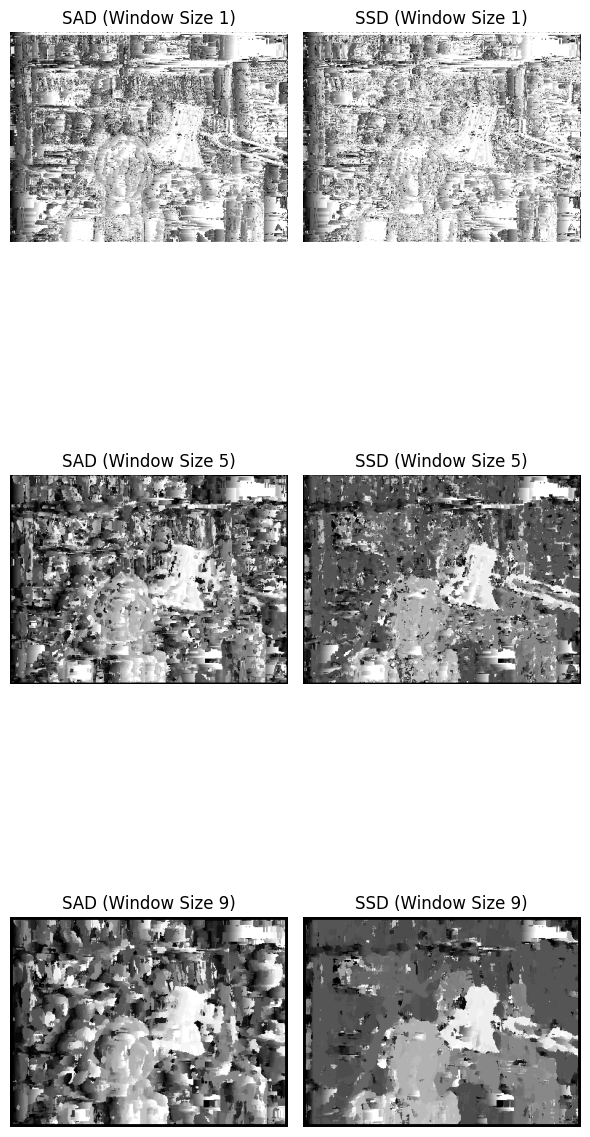

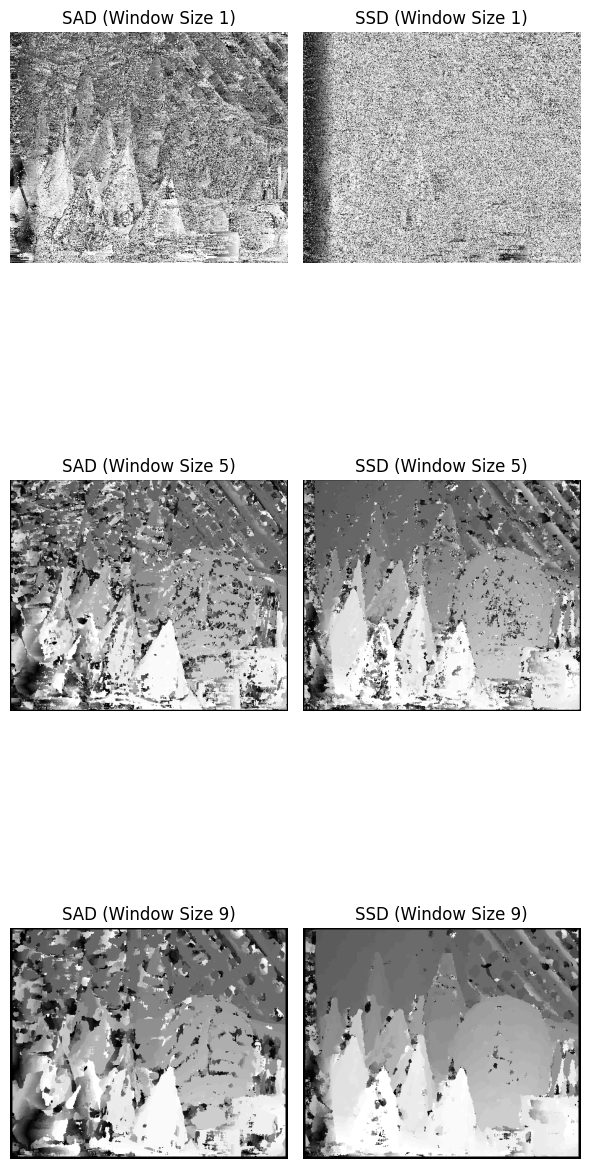

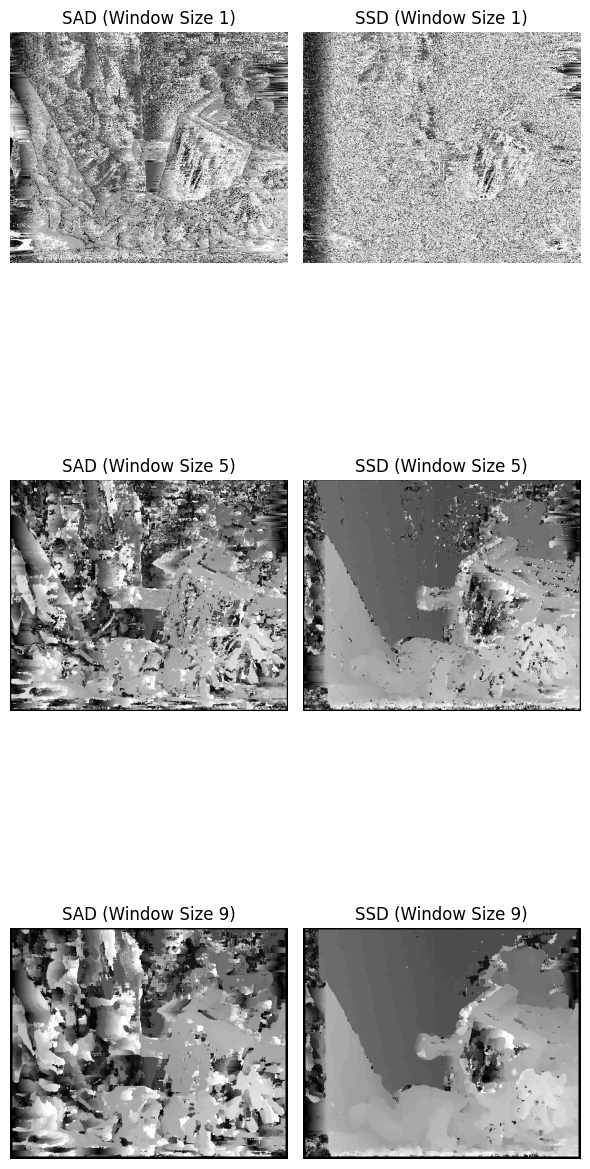

In [ ]:
images =[]
for i in range(NUMBER_OF_IMAGES):
    # Load images
    Il = cv2.imread(left_images[i], cv2.IMREAD_GRAYSCALE)
    Ir = cv2.imread(right_images[i], cv2.IMREAD_GRAYSCALE)

    # Set window sizes
    window_sizes = [1, 5, 9]
    # Create subplots for each window size
    fig, axs = plt.subplots(len(window_sizes), 2,figsize=(6, 15))

    # Iterate through window sizes and methods
    for j, window_size in enumerate(window_sizes):

        sad_disparity = get_disparity_map(Il, Ir, window_size, "SAD")
        images.append(sad_disparity)
        axs[j ,0].imshow(sad_disparity, cmap='gray')
        axs[j, 0].set_title(f'SAD (Window Size {window_size})')
        axs[j, 0].axis('off')

        ssd_disparity = get_disparity_map(Il, Ir, window_size, "SSD")
        images.append(sad_disparity)
        axs[j, 1].imshow(ssd_disparity, cmap='gray')
        axs[j, 1].set_title(f'SSD (Window Size {window_size})')
        axs[j, 1].axis('off')
        j=j+1

    plt.tight_layout()
    plt.show()
